# Machine Learning Lab 2


# Data Cleaning 

## 17th February 2021

In [1]:
# importing important libraries
import pandas as pd
import numpy as np

In [2]:
# loading file
df = pd.read_csv("lab2.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21.0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98.0
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15.0
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39.0
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72.0


The dataset looks like a form input, which maybe from a workshop or anything like that

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
enrollee_id               2129 non-null int64
city                      2129 non-null object
city_development_index    2126 non-null float64
gender                    1621 non-null object
relevent_experience       2109 non-null object
enrolled_university       2088 non-null object
education_level           2066 non-null object
major_discipline          1817 non-null object
experience                2124 non-null object
company_size              1507 non-null object
company_type              1495 non-null object
last_new_job              2089 non-null object
training_hours            2109 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 216.3+ KB


There are many non numeric features

In [5]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      3
gender                    508
relevent_experience        20
enrolled_university        41
education_level            63
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours             20
dtype: int64

We can see that there are many null values too, hence its not a good idea to drop them

# GENDER

In [6]:
#checking if nulls exist
df['gender'].isna().any()

True

In [7]:
df['gender'].describe()

count     1621
unique       3
top       Male
freq      1460
Name: gender, dtype: object

Applying Refuse to say in nulls to avoid bias and loss of data

In [10]:
df["gender"].fillna("Refuse to say", inplace = True)

In [11]:
uniqueGender = df['gender'].unique()
print(uniqueGender)

['Male' 'Female' 'Refuse to say' 'Other']


Value           | Encoding
------          | ------
'other'         | 0
'Male'          | 1
'Female'        | 2
'Refuse to say' | 3

Applying encoding

In [12]:
def convert(n):
    if n == 'Other':
        return 0
    if n == 'Male':
        return 1
    if n == 'Female':
        return 2
    if n == 'Refuse to say':
        return 3

In [13]:
df['cgender'] = df['gender'].apply(convert)
df['cgender'] = df['cgender'].astype(int) 

In [14]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,cgender
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21.0,1
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98.0,2
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15.0,1
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39.0,1
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72.0,1


# CITY

In [15]:
uniqueCity = df['city'].unique()
print(uniqueCity)

['city_41' 'city_103' 'city_21' 'city_13' 'city_23' 'city_160' 'city_173'
 'city_90' 'city_46' 'city_98' 'city_118' 'city_114' 'city_134' 'city_73'
 'city_116' 'city_16' 'city_165' 'city_61' 'city_136' 'city_45' 'city_104'
 'city_28' 'city_149' 'city_105' 'city_76' 'city_83' 'city_97' 'city_64'
 'city_31' 'city_19' 'city_11' 'city_143' 'city_100' 'city_67' 'city_75'
 'city_127' 'city_101' 'city_139' 'city_27' 'city_71' 'city_99' 'city_70'
 'city_69' 'city_44' 'city_150' 'city_74' 'city_176' 'city_155' 'city_167'
 'city_30' 'city_89' 'city_57' 'city_162' 'city_36' 'city_107' 'city_128'
 'city_39' 'city_102' 'city_65' 'city_10' 'city_40' 'city_152' 'city_123'
 'city_179' 'city_50' 'city_115' 'city_77' 'city_159' 'city_80' 'city_72'
 'city_171' 'city_158' 'city_138' 'city_142' 'city_25' 'city_14' 'city_33'
 'city_79' 'city_91' 'city_53' 'city_175' 'city_9' 'city_26' 'city_1'
 'city_54' 'city_24' 'city_48' 'city_126' 'city_82' 'city_141' 'city_43'
 'city_106' 'city_133' 'city_93' 'city_121

In [17]:
df['city'].isna().any()

False

To make the cities have only id, regex is applied to the column to extract only the id of the city. 

That is  ```city_94``` becomes ```94```

In [18]:
import re

def find(city):
    a = re.findall('\d+', city)
    for i in a:
        k = int(i)
    return k

df['ccity'] = df['city'].apply(find)

Since ```re.findall``` returns a list, the integer value of extracted.

In [19]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,cgender,ccity
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21.0,1,41
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98.0,2,103
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15.0,1,21
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39.0,1,13
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72.0,1,103


In [20]:
type(df['ccity'])

pandas.core.series.Series

# RELEVANT EXPERIENCE

In [21]:
df['relevent_experience'].isna().any()

True

In [22]:
df['relevent_experience'].isna().sum()

20

In [23]:
df['relevent_experience'].describe()

count                        2109
unique                          2
top       Has relevent experience
freq                         1508
Name: relevent_experience, dtype: object

In [24]:
df["relevent_experience"].fillna("Refuse to say", inplace = True)

In [25]:
uniqueExp = df['relevent_experience'].unique()
print(uniqueExp)

['Has relevent experience' 'No relevent experience' 'Refuse to say']


Value                            | Encoding
------                           | ------
'Has relevent experience'        | 0
'No relevent experience'         | 1
'Refuse to say'                  | 2

In [26]:
def convert(n):
    if n == 'Has relevent experience':
        return 1
    if n == 'No relevent experience':
        return 2
    if n == 'Refuse to say':
        return 0

In [27]:
df['cexp'] = df['relevent_experience'].apply(convert)
df['cexp'] = df['cexp'].astype(int) 

In [28]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,cgender,ccity,cexp
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21.0,1,41,1
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98.0,2,103,1
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15.0,1,21,2
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39.0,1,13,1
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72.0,1,103,1


# ENROLLED UNIVERSITY

In [29]:
df['enrolled_university'].isna().any()

True

In [30]:
df['enrolled_university'].isna().sum()

41

In [31]:
df['enrolled_university'].describe()

count              2088
unique                3
top       no_enrollment
freq               1514
Name: enrolled_university, dtype: object

In [32]:
df["enrolled_university"].fillna("Refuse to say", inplace = True)

In [33]:
uniqueExp = df['enrolled_university'].unique()
print(uniqueExp)

['Full time course' 'no_enrollment' 'Part time course' 'Refuse to say']


Value                            | Encoding
------                           | ------
'no enrollment'                  | 2
'Part time Course'               | 1
'Full time course'               | 3
'Refuse to say'                  | 0

In [34]:
def convert(n):
    if n == 'Refuse to say':
        return 0
    if n == 'Part time course':
        return 1
    if n == 'no_enrollment':
        return 2
    if n == 'Full time course':
        return 3

In [35]:
df['cuniv'] = df['enrolled_university'].apply(convert)

In [36]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,cgender,ccity,cexp,cuniv
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21.0,1,41,1,3
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98.0,2,103,1,2
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15.0,1,21,2,2
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39.0,1,13,1,2
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72.0,1,103,1,2


# EDUCATION LEVEL

In [37]:
df['education_level'].isna().any()

True

In [38]:
df['education_level'].fillna("Refuse to say", inplace = True)

In [39]:
uniqueEdu = df['education_level'].unique()
print(uniqueEdu)

['Graduate' 'High School' 'Masters' 'Refuse to say' 'Phd' 'Primary School']


Value                            | Encoding
------                           | ------
'Refuse to say'                  | 0
'Graduate'                       | 1
'High School'                    | 2
'Maters'                         | 3
'Phd'                            | 4
'Primary School'                 | 5

In [40]:
def convert(n):
    if n == 'Refuse to say':
        return 0
    if n == 'Graduate':
        return 1
    if n == 'High School':
        return 2
    if n == 'Masters':
        return 3
    if n == 'Phd':
        return 4
    if n == 'Primary School':
        return 5

In [41]:
df['cedu'] = df['education_level'].apply(convert)

In [42]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,cgender,ccity,cexp,cuniv,cedu
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21.0,1,41,1,3,1
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98.0,2,103,1,2,1
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15.0,1,21,2,2,2
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39.0,1,13,1,2,3
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72.0,1,103,1,2,1


# DISCIPLINE

In [43]:
df['major_discipline'].isna().any()

True

In [44]:
df['major_discipline'].fillna("Other", inplace = True)

In [45]:
uniqueDeg = df['major_discipline'].unique()
print(uniqueDeg)

['STEM' 'Other' 'Business Degree' 'Arts' 'Humanities' 'No Major']


Value                   | Encoding
------                  | ------
'Other'                 | 0
'STEM'                  | 1
'Business Degree'       | 2
'Arts'                  | 3
'Humanities'            | 4
'No Major'              | 5

In [46]:
def convert(n):
    if n == 'Other':
        return 0
    if n == 'STEM':
        return 1
    if n == 'Business Degree':
        return 2
    if n == 'Arts':
        return 3
    if n == 'Humanities':
        return 4
    if n == 'No Major':
        return 5

In [47]:
df['cdeg'] = df['major_discipline'].apply(convert)

In [48]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,cgender,ccity,cexp,cuniv,cedu,cdeg
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21.0,1,41,1,3,1,1
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98.0,2,103,1,2,1,1
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Other,<1,NaN,Pvt Ltd,never,15.0,1,21,2,2,2,0
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39.0,1,13,1,2,3,1
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72.0,1,103,1,2,1,1


# EXPERIENCE

In [49]:
df['experience'].isna().any()

True

In [50]:
uniqueExp = df['experience'].unique()
print(uniqueExp)

['9' '5' '<1' '11' '>20' '10' '14' '3' '20' '8' '4' '13' '2' '6' '7' '1'
 '19' '15' '16' nan '17' '18' '12']


In [51]:
df['experience'].fillna("1", inplace = True)

In [52]:
df['experience'].isna().any()

False

In [53]:
def convert(n):
    if n == '<1':
        return '0'
    if n == '>20':
        return '21'
    else:
        return n

In [54]:
df['cwexp'] = df['experience'].apply(convert)

In [55]:
uniqueExp = df['cwexp'].unique()
print(uniqueExp)

['9' '5' '0' '11' '21' '10' '14' '3' '20' '8' '4' '13' '2' '6' '7' '1'
 '19' '15' '16' '17' '18' '12']


In [56]:
df['cwexp'] = df['cwexp'].astype(int) 

In [57]:
uniqueExp = df['cwexp'].unique()
print(uniqueExp)

[ 9  5  0 11 21 10 14  3 20  8  4 13  2  6  7  1 19 15 16 17 18 12]


In [58]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,cgender,ccity,cexp,cuniv,cedu,cdeg,cwexp
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21.0,1,41,1,3,1,1,9
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98.0,2,103,1,2,1,1,5
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Other,<1,NaN,Pvt Ltd,never,15.0,1,21,2,2,2,0,0
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39.0,1,13,1,2,3,1,11
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72.0,1,103,1,2,1,1,21


# COMPANY SIZE

In [59]:
df['company_size'].isna().any()

True

In [60]:
uniqueSize = df['company_size'].unique()
print(uniqueSize)

['<10' nan 'Oct-49' '10000+' '100-500' '50-99' '1000-4999' '500-999'
 '5000-9999']


In [61]:
df['company_size'].fillna('50-99', inplace = True)

Value       | Encoding
------      |----------
'<10'       | 0
'50-99'     | 1
'100-500'   | 2
'500-999'   | 3
'1000-4999' | 4
'5000-9999' | 5
'10000+'    | 6

In [62]:
def convert(n):
    if n == '<10' :
        return 0
    if n == '50-99':
        return 1
    if n == '100-500' :
        return 2
    if n == '500-999':
        return 3
    if n == '1000-4999':
        return 4
    if n == '5000-9999': 
        return 5
    if n == '10000+':
        return 6
    else:
        return 1

In [63]:
df['csize'] = df['company_size'].apply(convert)

In [64]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,last_new_job,training_hours,cgender,ccity,cexp,cuniv,cedu,cdeg,cwexp,csize
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,...,1,21.0,1,41,1,3,1,1,9,0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,...,1,98.0,2,103,1,2,1,1,5,1
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Other,<1,50-99,...,never,15.0,1,21,2,2,2,0,0,1
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,...,1,39.0,1,13,1,2,3,1,11,1
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,...,>4,72.0,1,103,1,2,1,1,21,6


# COMPANY TYPE

In [65]:
df['company_type'].isna().any()

True

In [66]:
uniqueType = df['company_type'].unique()
print(uniqueType)

[nan 'Pvt Ltd' 'Funded Startup' 'Other' 'Public Sector'
 'Early Stage Startup' 'NGO']


In [67]:
df['company_type'].fillna('Other', inplace = True)

Value       | Encoding
------      |----------
'Other'       | 0
'Pvt Ltd'     | 1
'Funded Startup'      | 2
'Public Sector'       | 3
'Early Stage Startup' | 4
'NGO'                 | 5

In [68]:
def convert(n):
    if n == 'Other' :
        return 0
    if n == 'Pvt Ltd':
        return 1
    if n == 'Funded Startup' :
        return 2
    if n == 'Public Sector':
        return 3
    if n == 'Early Stage Startup':
        return 4
    if n == 'NGO': 
        return 5

In [69]:
df['ctype'] = df['company_type'].apply(convert)

In [70]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,training_hours,cgender,ccity,cexp,cuniv,cedu,cdeg,cwexp,csize,ctype
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,...,21.0,1,41,1,3,1,1,9,0,0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,...,98.0,2,103,1,2,1,1,5,1,1
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Other,<1,50-99,...,15.0,1,21,2,2,2,0,0,1,1
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,...,39.0,1,13,1,2,3,1,11,1,1
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,...,72.0,1,103,1,2,1,1,21,6,1


# LAST NEW JOB

In [71]:
df['last_new_job'].isna().any()

True

In [72]:
uniqueJob = df['last_new_job'].unique()
print(uniqueJob)

['1' 'never' '>4' '2' '4' '3' nan]


In [73]:
df['last_new_job'].fillna('1', inplace = True)

In [74]:
def convert(n):
    if n == '>4' :
        return '5'
    if n == 'never':
        return '0'
    else:
        return n

In [75]:
df['clast'] = df['last_new_job'].apply(convert)

In [76]:
uniqueJob = df['clast'].unique()
print(uniqueJob)

['1' '0' '5' '2' '4' '3']


In [77]:
df['clast'] = df['clast'].astype(int)

# CHECKING THE DATAFRAME

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 23 columns):
enrollee_id               2129 non-null int64
city                      2129 non-null object
city_development_index    2126 non-null float64
gender                    2129 non-null object
relevent_experience       2129 non-null object
enrolled_university       2129 non-null object
education_level           2129 non-null object
major_discipline          2129 non-null object
experience                2129 non-null object
company_size              2129 non-null object
company_type              2129 non-null object
last_new_job              2129 non-null object
training_hours            2109 non-null float64
cgender                   2129 non-null int32
ccity                     2129 non-null int64
cexp                      2129 non-null int32
cuniv                     2129 non-null int64
cedu                      2129 non-null int64
cdeg                      2129 non-null int64
cwexp

# MAKING NEW DATAFRAME

In [79]:
data = pd.DataFrame(df, columns = ['enrollee_id', 
                                   'ccity',
                                   'city_development_index',
                                   'ccity',
                                   'cexp',
                                   'cuniv',
                                   'cedu',
                                   'cdeg',
                                   'cwexp',
                                   'csize',
                                   'ctype',
                                   'training_hours',
                                   'clast'])

In [92]:
data.head()

,enrollee_id,ccity,city_development_index,ccity,cexp,cuniv,cedu,cdeg,cwexp,csize,ctype,training_hours,clast
0,32403,41,0.827,41,1,3,1,1,9,0,0,21.0,1
1,9858,103,0.920,103,1,2,1,1,5,1,1,98.0,1
2,31806,21,0.624,21,2,2,2,0,0,1,1,15.0,0
3,27385,13,0.827,13,1,2,3,1,11,1,1,39.0,1
4,27724,103,0.920,103,1,2,1,1,21,6,1,72.0,5


In [93]:
data = data.drop('ccity',axis=1)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 11 columns):
enrollee_id               2129 non-null int64
city_development_index    2126 non-null float64
cexp                      2129 non-null int32
cuniv                     2129 non-null int64
cedu                      2129 non-null int64
cdeg                      2129 non-null int64
cwexp                     2129 non-null int32
csize                     2129 non-null int64
ctype                     2129 non-null int64
training_hours            2109 non-null float64
clast                     2129 non-null int32
dtypes: float64(2), int32(3), int64(6)
memory usage: 158.1 KB


# Exploratory Data Analysis

In [82]:
print (data.describe())

        enrollee_id        ccity  city_development_index        ccity  \
count   2129.000000  2129.000000             2126.000000  2129.000000   
mean   16861.614843    80.620479                0.824939    80.620479   
std     9576.846029    47.759350                0.125126    47.759350   
min        3.000000     1.000000                0.448000     1.000000   
25%     8562.000000    21.000000                0.698000    21.000000   
50%    16816.000000   102.000000                0.903000   102.000000   
75%    25129.000000   114.000000                0.920000   114.000000   
max    33353.000000   180.000000                0.949000   180.000000   

              cexp        cuniv         cedu         cdeg        cwexp  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000   
mean      1.272898     2.096759     1.681071     1.022076    10.083607   
std       0.466171     0.580894     1.046487     0.847365     6.873150   
min       0.000000     0.000000     0.000000  

Value                            | Encoding
------                           | ------
'Refuse to say'                  | 0
'Graduate'                       | 1
'High School'                    | 2
'Maters'                         | 3
'Phd'                            | 4
'Primary School'                 | 5

In [84]:
data.groupby('cedu').size()

cedu
0      63
1    1262
2     221
3     493
4      54
5      36
dtype: int64

# Heatmap

In [86]:
print(data.corr())

                        enrollee_id     ccity  city_development_index  \
enrollee_id                1.000000 -0.072215               -0.045169   
ccity                     -0.072215  1.000000                0.406208   
city_development_index    -0.045169  0.406208                1.000000   
ccity                     -0.072215  1.000000                0.406208   
cexp                       0.019308  0.006490               -0.068717   
cuniv                     -0.011056 -0.063804               -0.101800   
cedu                      -0.018993  0.041580                0.112566   
cdeg                       0.024405  0.034566                0.100582   
cwexp                     -0.019195  0.150322                0.399526   
csize                     -0.030244  0.015249                0.103840   
ctype                     -0.017352  0.031474                0.074052   
training_hours             0.002658 -0.006877               -0.019506   
clast                     -0.043975  0.096033      

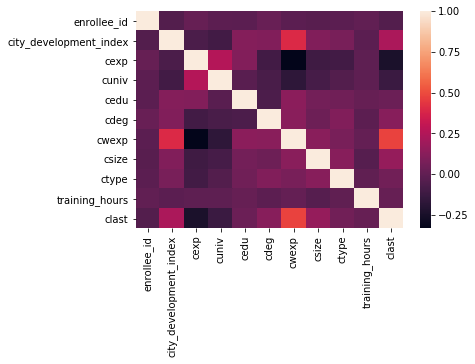

In [95]:
import matplotlib.pyplot as mp 
import seaborn as sb 

dataplot = sb.heatmap(data.corr()) 
dataplot